In [2]:
# pip install pydotplus

ERROR: Could not find a version that satisfies the requirement AdaBoost (from versions: none)
ERROR: No matching distribution found for AdaBoost


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


In [6]:
data = pd.read_csv('iris.csv')

In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
x = data.drop('species',axis=1)
y = data['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [10]:
#split the data into features x and target y
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [11]:
clf = DecisionTreeClassifier()

In [12]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

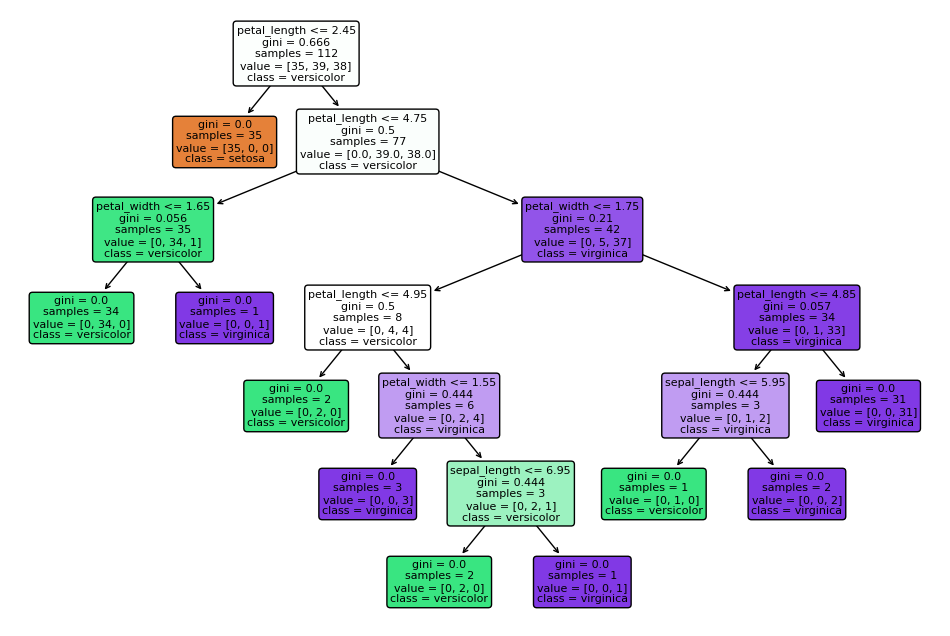

In [13]:
# Visualize the decision tree
# dot_data = export_graphviz(
#    clf,
#    out_file=None,
#    feature_names=X.columns,
#    class_names=y.unique(),
#    filled=True,
#    rounded=True,
#    special_characters=True
# )

# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png("iris_decision_tree.png")

plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=x.columns,
    class_names=y.unique(),
    filled=True,
    rounded=True
)
plt.savefig("iris_decision_tree.png")  # Change the filename and format as needed
# plt.show()


In [14]:
y_pred = clf.predict(X_test)

In [15]:
# Evaluate Random Forest model
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Random Forest Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [16]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [17]:
# Create and train a Random Forest classifier (n_estimators=100 decision tree use)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Make predictions using Random Forest
rf_y_pred = rf_clf.predict(X_test)


In [19]:
# Evaluate Random Forest model
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
rf_precision = metrics.precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = metrics.recall_score(y_test, rf_y_pred, average='weighted')
rf_f1_score = metrics.f1_score(y_test, rf_y_pred, average='weighted')

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1_score:.2f}")


Random Forest Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [20]:
# Compare results with single Decision Tree
print("\nComparison with Single Decision Tree:")
print("Decision Tree Accuracy: {accuracy:.2f}")
print("Random Forest Accuracy: {rf_accuracy:.2f}")
print("Gradient Boosting Accuracy: {gb_accuracy:.2f}")


Comparison with Single Decision Tree:
Decision Tree Accuracy: {accuracy:.2f}
Random Forest Accuracy: {rf_accuracy:.2f}
Gradient Boosting Accuracy: {gb_accuracy:.2f}
